In [0]:
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as f
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType
from pyspark.sql.types import FloatType
from pyspark.sql import SQLContext
from pyspark.sql.functions import when
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col
from pyspark.sql import types
from pyspark.sql.functions import count
import numpy as np
import pandas as pd
import os
import time
from pytz import timezone 
from datetime import  datetime, timedelta 
from delta.tables import DeltaTable
import datetime as dt
import pytz


from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler, OneHotEncoder 
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

%matplotlib inline
sqlContext = SQLContext(sc)

In [0]:
# Inspect the Mount's Final Project folder 
display(dbutils.fs.ls("/mnt/mids-w261/datasets_final_project"))

path,name,size
dbfs:/mnt/mids-w261/datasets_final_project/airlines/,airlines/,0
dbfs:/mnt/mids-w261/datasets_final_project/airlines_data/,airlines_data/,0
dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/,parquet_airlines_data/,0
dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data_3m/,parquet_airlines_data_3m/,0
dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data_6m/,parquet_airlines_data_6m/,0
dbfs:/mnt/mids-w261/datasets_final_project/stations_data/,stations_data/,0
dbfs:/mnt/mids-w261/datasets_final_project/weather_data/,weather_data/,0
dbfs:/mnt/mids-w261/datasets_final_project/weather_data_6_hr/,weather_data_6_hr/,0
dbfs:/mnt/mids-w261/datasets_final_project/weather_data_single/,weather_data_single/,0


### Load Joined Data

In [0]:
# Load full dataset for Flights + Weather + Stations
df_airlines = spark.read.parquet("/mnt/team11/all_flight_weather_5y/*")
display(df_airlines.limit(10))

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-4331613222387861> in <module> 
 1 # Load full dataset for Flights + Weather + Stations 
 ----> 2 df_airlines = spark . read . parquet ( "/mnt/team11/all_flight_weather_5y/*" ) 
 3 display ( df_airlines . limit ( 10 ) ) 

 /databricks/spark/python/pyspark/sql/readwriter.py in parquet (self, *paths, **options) 
 483 int96RebaseMode=int96RebaseMode)
 484 
 --> 485 return self . _df ( self . _jreader . parquet ( _to_seq ( self . _spark . _sc , paths ) ) ) 
 486 
 487 def text(self, paths, wholetext=False, lineSep=None, pathGlobFilter=None,

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 108 def deco ( * a , ** kw ) : 
 109 try : 
 --> 110 return f ( * a , ** kw ) 
 111 except py4j . protocol . Py4JJavaError as e : 
 112 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling o293.parquet.
: shaded.databricks.org.apache.hadoop.fs.azure.AzureException: hadoop_azure_shaded.com.microsoft.azure.storage.StorageException: The specified account is disabled.
	at shaded.databricks.org.apache.hadoop.fs.azure.AzureNativeFileSystemStore.retrieveMetadata(AzureNativeFileSystemStore.java:2159)
	at shaded.databricks.org.apache.hadoop.fs.azure.NativeAzureFileSystem.listStatus(NativeAzureFileSystem.java:2370)
	at com.databricks.backend.daemon.data.client.DBFSV2.$anonfun$listStatus$2(DatabricksFileSystemV2.scala:95)
	at com.databricks.s3a.S3AExeceptionUtils$.convertAWSExceptionToJavaIOException(DatabricksStreamUtils.scala:66)
	at com.databricks.backend.daemon.data.client.DBFSV2.$anonfun$listStatus$1(DatabricksFileSystemV2.scala:92)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$4(UsageLogging.scala:434)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:240)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:235)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:232)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.withAttributionContext(DatabricksFileSystemV2.scala:455)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:279)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:271)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.withAttributionTags(DatabricksFileSystemV2.scala:455)
	at com.databricks.logging.UsageLogging.recordOperation(UsageLogging.scala:415)
	at com.databricks.logging.UsageLogging.recordOperation$(UsageLogging.scala:341)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.recordOperation(DatabricksFileSystemV2.scala:455)
	at com.databricks.backend.daemon.data.client.DBFSV2.listStatus(DatabricksFileSystemV2.scala:92)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileSystem.scala:150)
	at org.apache.hadoop.fs.Globber.listStatus(Globber.java:69)
	at org.apache.hadoop.fs.Globber.glob(Globber.java:217)
	at org.apache.hadoop.fs.FileSystem.globStatus(FileSystem.java:1657)
	at org.apache.spark.deploy.SparkHadoopUtil.$anonfun$globPath$1(SparkHadoopUtil.s

# EDA

Take a closer look at the airline dataset
field meaning source: https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ

The dataset contains the following information:
- Date and time [[note that the departure and arrival time are in local time]]
- Carrier and airline ID
- Tail number
- Origin airport, city & state
- Destination airport, city & state
- CRSDepTime: CRS Departure Time (local time: hhmm)	 
- DepTime: Actual Departure Time (local time: hhmm)
- DepDelay: depart: Difference in minutes between scheduled and actual departure time
- DepDel15:	Departure Delay Indicator, 15 Minutes or More (1=Yes)
- ARR_TIME： Actual Arrival Time (local time: hhmm)
- ARR_DELAY：Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
- ARR_DEL15: Arrival Delay Indicator, 15 Minutes or More (1=Yes)
- Distance:	Distance between airports (miles)
- CANCELLED: Cancelled Flight Indicator (1=Yes)
- Diverted:	Diverted Flight Indicator (1=Yes)
- Cause of Delay:
  - CarrierDelay	Carrier Delay, in Minutes	Analysis
  - WeatherDelay	Weather Delay, in Minutes	Analysis
  - NASDelay	National Air System Delay, in Minutes	Analysis
  - SecurityDelay	Security Delay, in Minutes	Analysis
  - LateAircraftDelay	Late Aircraft Delay, in Minutes

In [0]:
#Size 
print(f"Airline table has {df_airlines.count()} rows and {len(df_airlines.columns) } columns.")

#The number of airlines and airports
df_airlines.select('ORIGIN').distinct().count()
print(f"The number of distinct airports is: {df_airlines.select('ORIGIN').distinct().count()}")
print(f"The number of distinct airlines is: {df_airlines.select('OP_UNIQUE_CARRIER').distinct().count()}")

#The min and max time of airline table
max_time_airline =df_airlines.select(f.max(f.col("FL_DATE")).alias("MAX")).limit(1).collect()[0].MAX
min_time_airline =df_airlines.select(f.min(f.col("FL_DATE")).alias("MIN")).limit(1).collect()[0].MIN

print(f"The first date in the airline table is: {min_time_airline}")
print(f"The last date in airlines table is: {max_time_airline}")

Airline table has 31178801 rows and 107 columns.
The number of distinct airports is: 369
The number of distinct airlines is: 19
The first date in the airline table is: 2015-01-01
The last date in airlines table is: 2019-12-31

In [0]:
## create function to get null values in the dataset

def get_null_columns(table, tablename):
    nullColumns = []
    numRows = table.count()
    print(f"====Printing the columns with null value numbers for \'{tablename}\' table====")
    total_rows = table.count()
    for k in table.columns:
        nullRows = table.where(col(k).isNull()).count()
        if(nullRows>0):
            print(f"{k}: {nullRows} null rows, {round(nullRows*100/total_rows,2)}% percent")
        if nullRows ==  numRows: # i.e. if ALL values are NULL
            nullColumns.append(k)
            
    return nullColumns

In [0]:
get_null_columns(df_airlines, "airlines")

====Printing the columns with null value numbers for 'airlines' table====
DEP_DELAY: 4725 null rows, 0.02% percent
DEP_DELAY_NEW: 4725 null rows, 0.02% percent
DEP_DEL15: 4725 null rows, 0.02% percent
DEP_DELAY_GROUP: 4725 null rows, 0.02% percent
WHEELS_ON: 1 null rows, 0.0% percent
TAXI_IN: 1 null rows, 0.0% percent
ARR_TIME: 1 null rows, 0.0% percent
ARR_DELAY: 2600 null rows, 0.01% percent
ARR_DELAY_NEW: 2600 null rows, 0.01% percent
ARR_DEL15: 2600 null rows, 0.01% percent
ARR_DELAY_GROUP: 2600 null rows, 0.01% percent
CANCELLATION_CODE: 31178801 null rows, 100.0% percent
ACTUAL_ELAPSED_TIME: 2 null rows, 0.0% percent
AIR_TIME: 2 null rows, 0.0% percent
CARRIER_DELAY: 25379687 null rows, 81.4% percent
WEATHER_DELAY: 25379687 null rows, 81.4% percent
NAS_DELAY: 25379687 null rows, 81.4% percent
SECURITY_DELAY: 25379687 null rows, 81.4% percent
LATE_AIRCRAFT_DELAY: 25379687 null rows, 81.4% percent
ORIGIN_airportID: 1416 null rows, 0.0% percent
ORIGIN_ICAO: 1416 null rows, 0.0% percent
ORIGIN_Timezone: 1416 null rows, 0.0% percent
ORIGIN_TZ: 1416 null rows, 0.0% percent
DEST_airportID: 1412 null rows, 0.0% percent
DEST_ICAO: 1412 null rows, 0.0% percent
DEST_Timezone: 1412 null rows, 0.0% percent
DEST_TZ: 1412 null rows, 0.0% percent
CRS_DEP_DATETIME: 1416 null rows, 0.0% percent
ACT_DEP_DATETIME: 4206 null rows, 0.01% percent
EARLIER_DATETIME: 1416 null rows, 0.0% percent
CRS_ARR_DATETIME: 1610 null rows, 0.01% percent
ACT_ARR_DATETIME: 16079 null rows, 0.05% percent
ORIGIN_near_station: 136722 null rows, 0.44% percent
DEST_near_station: 137088 null rows, 0.44% percent
ORIG_weather_date: 136728 null rows, 0.44% percent
ORIG_LATITUDE: 136728 null rows, 0.44% percent
ORIG_LONGITUDE: 136728 null rows, 0.44% percent
ORIG_ELEVATION: 136728 null rows, 0.44% percent
ORIG_direction_angle: 4564974 null rows, 14.64% percent
ORIG_speed: 217002 null rows, 0.7% percent
ORIG_ceiling_height: 4284486 null rows, 13.74% percent
ORIG_ceiling_quality: 136728 null rows, 0.44% percent
ORIG_vis_distance: 213486 null rows, 0.68% percent
ORIG_variability: 25873161 null rows, 82.98% percent
ORIG_air_temp: 216833 null rows, 0.7% percent
ORIG_dew_point: 224478 null rows, 0.72% percent
ORIG_sea_level_pressure: 2398229 null rows, 7.69% percent
ORIG_precipitation_hrs: 5920271 null rows, 18.99% percent
ORIG_precipitation_depth: 5918225 null rows, 18.98% percent
DEST_weather_date: 138511 null rows, 0.44% percent
DEST_LATITUDE: 138511 null rows, 0.44% percent
DEST_LONGITUDE: 138511 null rows, 0.44% percent
DEST_ELEVATION: 138511 null rows, 0.44% percent
DEST_direction_angle: 4601826 null rows, 14.76% percent
DEST_speed: 308894 null rows, 0.99% percent
DEST_ceiling_height: 4309814 null rows, 13.82% percent
DEST_ceiling_quality: 138511 null rows, 0.44% percent
DEST_vis_distance: 305155 null rows, 0.98% percent
DEST_variability: 25868065 null rows, 82.97% percent
DEST_air_temp: 309750 null rows, 0.99% percent
DEST_dew_point: 317518 null rows, 1.02% percent
DEST_sea_level_pressure: 2476933 null rows, 7.94% percent
DEST_precipitation_hrs: 5822842 null rows, 18.68% percent
DEST_precipitation_depth: 5822230 null rows, 18.67% percent
Out[6]: ['CANCELLATION_CODE']

### Departure Delay and Data Imbalance
As we can see from the below output, the percentage of flights being delayed by more than 15 minutes is 18.15%. This indicates a fairly significant imbalance of the data for our machine learning models. This could result in a prediction bias towards the majority class, which is "no delay" in this case. Therefore, we need to keep this in mind when pre-processing the data for later modeling purpose and take actions to account for this imbalance.

In [0]:
# General overview of departure delays
## Count the number of departure delays, percentage of departure delays
total_flights_delayed=df_airlines.select( 'DEP_DEL15').filter(f.col('DEP_DEL15')=='1').count()
total_flights_not_delayed=df_airlines.select( 'DEP_DEL15').filter(f.col('DEP_DEL15')=='0').count()
print(f"The total number of flights delayed by more than 15 minutes: {total_flights_delayed}.")
print(f"The total number of flights delayed by no more than 15 minuntes: {total_flights_not_delayed}.")
print(f"The percentage of flights being delayed by more than 15 minutes is {round(100*total_flights_delayed/(total_flights_delayed+total_flights_not_delayed), 2)}%.")


The total number of flights delayed by more than 15 minutes: 5658954.
The total number of flights delayed by no more than 15 minuntes: 25515122.
The percentage of flights being delayed by more than 15 minutes is 18.15%.

### Exploring Temporal Factors on Departure Delay
This section explores the relationship between time-related factors on flight departure delays. More specifically, we looked at:
- Time of Day
- Day of Week
- Day of Month
- Month of Year
- Quarter

From the distribution graphs, we can observe that:
- Time of Day: The number of delays increase in the afternoon and reach is peak during 5-7pm. 
- Day Of Week: Monday, Thursday, and Friday have more departure delays than other days of the week.
- Day of Month: No obvious pattern.
- Month of Week: June, July, August, and December have more departure delays than other months of the year.

The diagram suggest that including temporal features in our machine learning model can contribute valuable information to the prediction.

In [0]:
## Explore potential relationships between number of flight departure delays and other features.

# hour of the day
data = df_airlines
data = data.withColumn("HOUR_OF_DAY", when(f.col("CRS_DEP_TIME") > 999, data.CRS_DEP_TIME.substr(1, 2)).when(f.col("CRS_DEP_TIME") > 99, data.CRS_DEP_TIME.substr(1,1)).otherwise(0))

dep_delay_num = data.select( 'HOUR_OF_DAY','DEP_DEL15' ).groupBy('HOUR_OF_DAY').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'DEP_DEL_NUM') 
df = dep_delay_num.toPandas()
df['HOUR_OF_DAY'] = df['HOUR_OF_DAY'].astype(int)
data_hour = df.sort_values(by='HOUR_OF_DAY', ascending=True)


# day of the week
dayOfWeek_delay = df_airlines.select( 'DAY_OF_WEEK','DEP_DEL15' ).groupBy('DAY_OF_WEEK').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL') 
df = dayOfWeek_delay.toPandas()
data_day = df.sort_values(by='DAY_OF_WEEK', ascending=True)

# day of month
dayOfMonth_delay = data.select( 'DAY_OF_MONTH','DEP_DEL15')\
.groupBy('DAY_OF_MONTH').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL')   
df = dayOfMonth_delay.toPandas()
data_day_month = df.sort_values(by='DAY_OF_MONTH', ascending=True)


# month of the year

month_delay =df_airlines.select( 'MONTH','DEP_DEL15' ).groupBy('MONTH').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL') 
df = month_delay.toPandas()
data_month = df.sort_values(by='MONTH', ascending=True)


# quarter
qtr_delay=df_airlines.select( 'QUARTER','DEP_DEL15' ).groupBy('QUARTER').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL') 
df = qtr_delay.toPandas()
data_quarter = df.sort_values(by='QUARTER', ascending=True)

# year
yr_delay=df_airlines.select( 'YEAR','DEP_DEL15' ).groupBy('YEAR').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL') 
df = yr_delay.toPandas()
data_yr = df.sort_values(by='YEAR', ascending=True)


Out[18]:

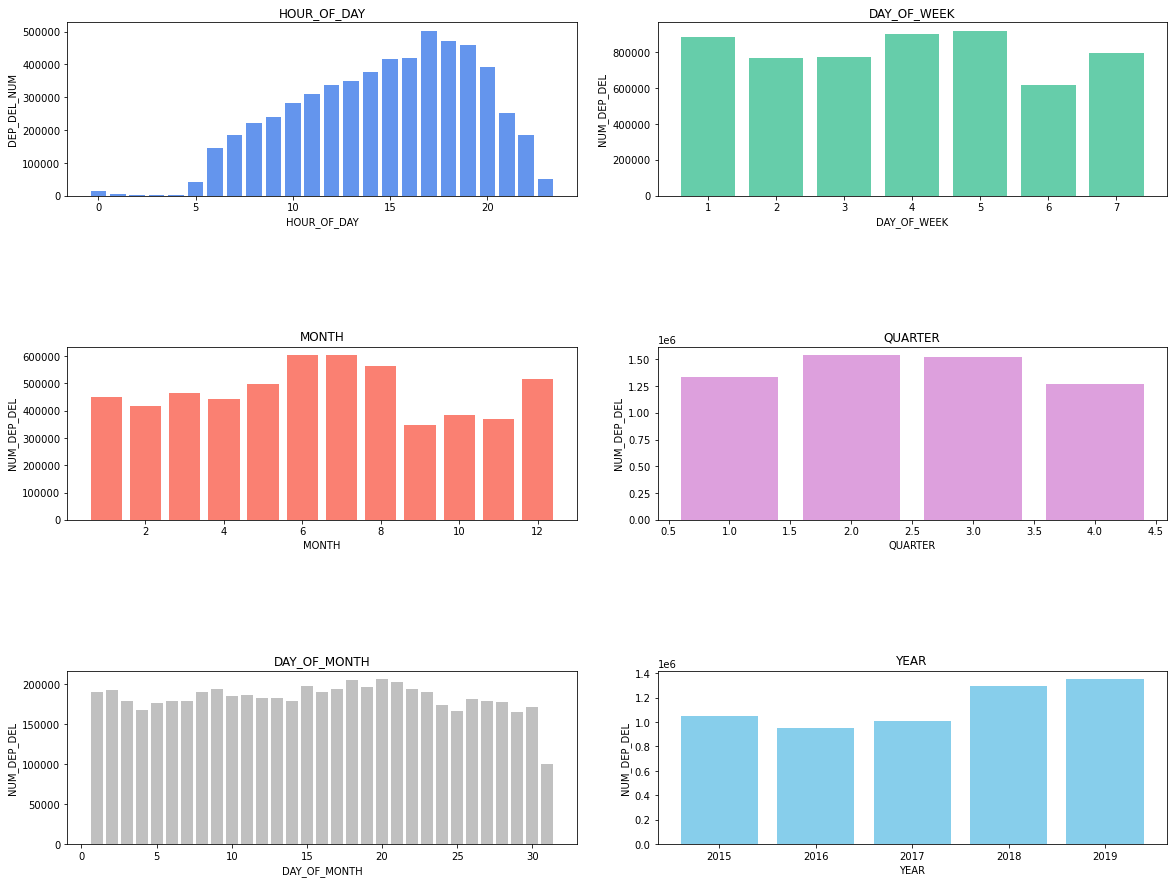

Text(0.5, 1.0, 'YEAR')

In [0]:
# Plot graphs to visualize relationship

fig, ax = plt.subplots(3,2, figsize = (16, 12))
fig.tight_layout(h_pad=13, w_pad=5) 

ax[0][0].bar(data_hour['HOUR_OF_DAY'] , data_hour['DEP_DEL_NUM'],  
            label='DEP_DEL_NUM', color = 'cornflowerblue' )
ax[0][0].set_xlabel('HOUR_OF_DAY')
ax[0][0].set_ylabel('DEP_DEL_NUM')
ax[0][0].set_title('HOUR_OF_DAY')

ax[0][1].bar(data_day['DAY_OF_WEEK'] , data_day['NUM_DEP_DEL'],  
            label='NUM_DEP_DEL', color = 'mediumaquamarine')
ax[0][1].set_xlabel('DAY_OF_WEEK')
ax[0][1].set_ylabel('NUM_DEP_DEL')
ax[0][1].set_title('DAY_OF_WEEK')

ax[1][0].bar(data_month['MONTH'] , data_month['NUM_DEP_DEL'],  
            label='NUM_DEP_DEL', color = 'salmon' )
ax[1][0].set_xlabel('MONTH')
ax[1][0].set_ylabel('NUM_DEP_DEL')
ax[1][0].set_title('MONTH')

ax[1][1].bar(data_quarter['QUARTER'] , data_quarter['NUM_DEP_DEL'],  
            label='NUM_DEP_DEL', color = 'plum' )
ax[1][1].set_xlabel('QUARTER')
ax[1][1].set_ylabel('NUM_DEP_DEL')
ax[1][1].set_title('QUARTER')

ax[2][0].bar(data_day_month['DAY_OF_MONTH'] , data_day_month['NUM_DEP_DEL'],  
            label='NUM_DEP_DEL', color = 'silver')
ax[2][0].set_xlabel('DAY_OF_MONTH')
ax[2][0].set_ylabel('NUM_DEP_DEL')
ax[2][0].set_title('DAY_OF_MONTH')

ax[2][1].bar(data_yr['YEAR'] , data_yr['NUM_DEP_DEL'],  
            label='NUM_DEP_DEL', color = 'skyblue')
ax[2][1].set_xlabel('YEAR')
ax[2][1].set_ylabel('NUM_DEP_DEL')
ax[2][1].set_title('YEAR')


### Exploring Airline and Airport Factors on Departure Delay

As we can see from the distribution graph, there are clearly relationship between number of departure delays and airlines as well as airports. 
- Airlines: The airlines with the highest number of delays are: WN: Southwest Airlines, AA: American Airlines, DL: Delta Airlines
- Airports: The top 3 airports with the highest number of delays are: ATL, ORD and DFW. This makes sense since ATL and ORD are the busiest airports/connection hubs in the U.S.

In [0]:
# Construct dataframes to examine airport and airline relationships to delays
num_dep_delay=df_airlines.select( 'OP_UNIQUE_CARRIER','DEP_DEL15' ).groupBy('OP_UNIQUE_CARRIER').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL') 
df = num_dep_delay.toPandas()
df2 = df.sort_values(by='NUM_DEP_DEL', ascending=False)
data_airline = df2.head(10)

#Airports
num_dep_delay=df_airlines.select( 'ORIGIN','DEP_DEL15' ).groupBy('ORIGIN').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'NUM_DEP_DEL') 
df = num_dep_delay.toPandas()
df2 = df.sort_values(by='NUM_DEP_DEL', ascending=False)
data_airport = df2.head(10)

Out[20]:

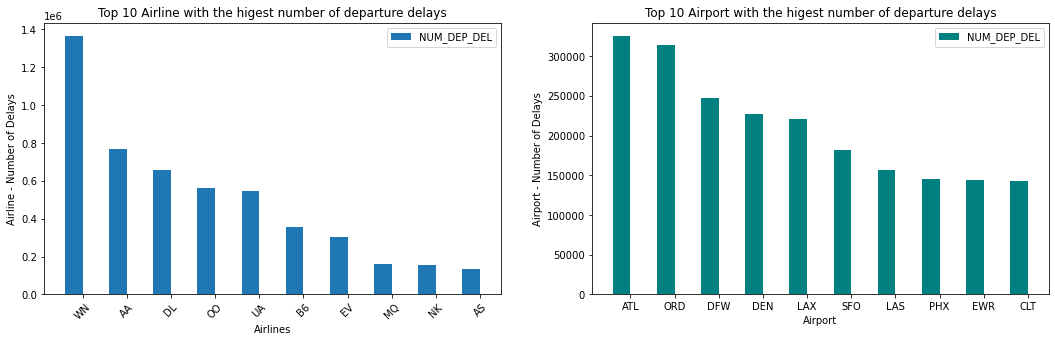

<matplotlib.legend.Legend at 0x7f9e9579c220>

In [0]:
#Group bar charts for airlines and airports depicting arrival and departure delay
fig, ax = plt.subplots(1,2, figsize = (18, 5))
#Airlines
x = np.arange(len(data_airline['OP_UNIQUE_CARRIER'].unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Add `width` parameter now which sets the width of each bar.
b1 = ax[0].bar(x, data_airline['NUM_DEP_DEL'],
            width=bar_width, label='NUM_DEP_DEL')
 
ax[0].set_ylabel("Airline - Number of Delays")
ax[0].set_xlabel("Airlines")
ax[0].set_title("Top 10 Airline with the higest number of departure delays")
ax[0].set_xticks(x + bar_width / 2)
ax[0].set_xticklabels(data_airline['OP_UNIQUE_CARRIER'].unique())
# Add legend.
ax[0].legend()
ax[0].set_xticklabels(data_airline['OP_UNIQUE_CARRIER'], rotation=45)

#Airports
x = np.arange(len(data_airport['ORIGIN'].unique()))
bar_width = 0.4
b1 = ax[1].bar(x, data_airport['NUM_DEP_DEL'],
            width=bar_width, label='NUM_DEP_DEL', color='Teal')
 
ax[1].set_ylabel("Airport - Number of Delays")
ax[1].set_xlabel("Airport")
ax[1].set_title("Top 10 Airport with the higest number of departure delays")
ax[1].set_xticks(x + bar_width / 2)
ax[1].set_xticklabels(data_airport['ORIGIN'].unique())
# Add legend.
ax[1].legend()

In [0]:
data = df_airlines.sample(False, 0.01, seed = None)
data1 = data.select(['DEP_DELAY', 'ORIG_vis_distance', 'ORIG_ceiling_height', 'ORIG_air_temp','ORIG_direction_angle','ORIG_speed','ORIG_sea_level_pressure', 'ORIG_dew_point', 'ORIG_precipitation_hrs','ORIG_precipitation_depth'])
df_airlines_weather = data1.select("*").toPandas()

Out[28]:

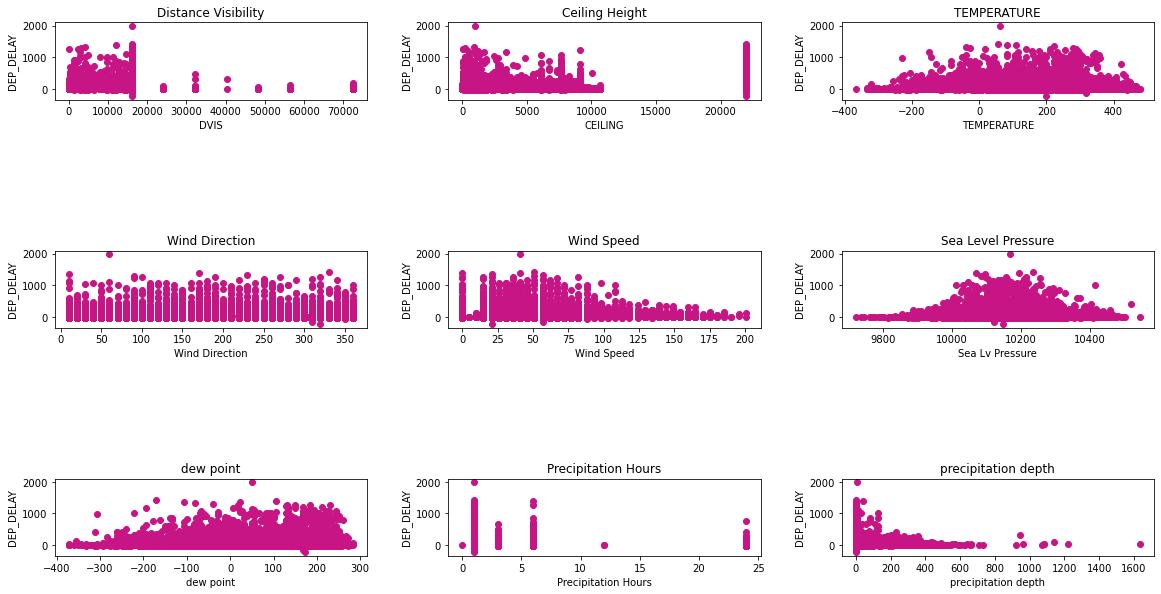

Text(0.5, 1.0, 'precipitation depth')

In [0]:
# Create plots of the key weather features and departure delay 

fig, ax = plt.subplots(3,3, figsize = (16, 8))
fig.tight_layout(h_pad=13, w_pad=5)  
ax[0][0].scatter(df_airlines_weather['ORIG_vis_distance'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][0].set_xlabel('DVIS')
ax[0][0].set_ylabel('DEP_DELAY')
ax[0][0].set_title('Distance Visibility')

ax[0][1].scatter(df_airlines_weather['ORIG_ceiling_height'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][1].set_xlabel('CEILING')
ax[0][1].set_ylabel('DEP_DELAY')
ax[0][1].set_title('Ceiling Height')

ax[0][2].scatter(df_airlines_weather['ORIG_air_temp'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[0][2].set_xlabel('TEMPERATURE')
ax[0][2].set_ylabel('DEP_DELAY')
ax[0][2].set_title('TEMPERATURE')

ax[1][0].scatter(df_airlines_weather['ORIG_direction_angle'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][0].set_xlabel('Wind Direction')
ax[1][0].set_ylabel('DEP_DELAY')
ax[1][0].set_title('Wind Direction')

ax[1][1].scatter(df_airlines_weather['ORIG_speed'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][1].set_xlabel('Wind Speed')
ax[1][1].set_ylabel('DEP_DELAY')
ax[1][1].set_title('Wind Speed')

ax[1][2].scatter(df_airlines_weather['ORIG_sea_level_pressure'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[1][2].set_xlabel('Sea Lv Pressure')
ax[1][2].set_ylabel('DEP_DELAY')
ax[1][2].set_title('Sea Level Pressure')

ax[2][0].scatter(df_airlines_weather['ORIG_dew_point'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[2][0].set_xlabel('dew point')
ax[2][0].set_ylabel('DEP_DELAY')
ax[2][0].set_title('dew point')

ax[2][1].scatter(df_airlines_weather['ORIG_precipitation_hrs'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[2][1].set_xlabel('Precipitation Hours')
ax[2][1].set_ylabel('DEP_DELAY')
ax[2][1].set_title('Precipitation Hours')

ax[2][2].scatter(df_airlines_weather['ORIG_precipitation_depth'] , df_airlines_weather['DEP_DELAY'],  
            label='DEP_DELAY', color = 'mediumvioletred')
ax[2][2].set_xlabel('precipitation depth')
ax[2][2].set_ylabel('DEP_DELAY')
ax[2][2].set_title('precipitation depth')



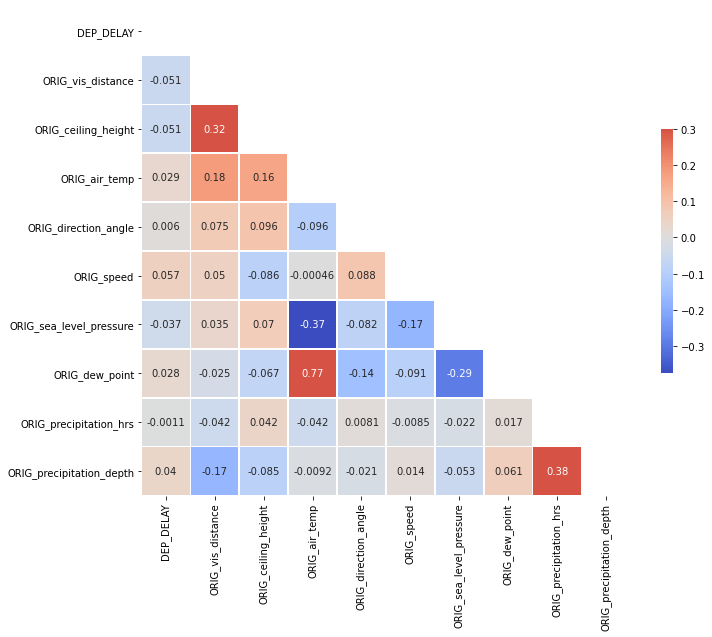

In [0]:
#Explore the correlation between weather features and the departure delay
plt.figure(figsize=(16,8))
corr = df_airlines_weather.corr() 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap='coolwarm'
#cmap="warm"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

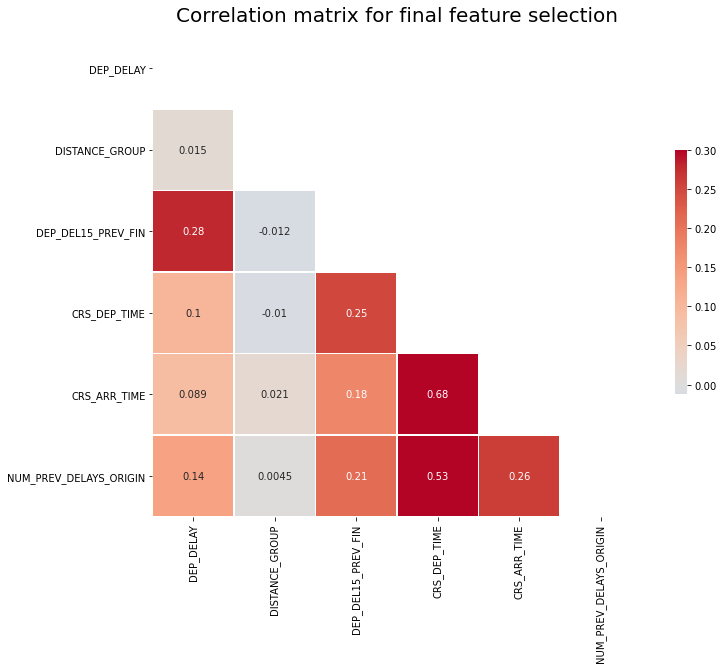

In [0]:
#correlation matrix for temporal, location, snowball delay factors
df_full_joined_name = "/mnt/v2team11/full_joined_flight_weather_graph_delay_features_v2/"
df_full_joined = spark.read.parquet(df_full_joined_name)

df_corr1 = df_full_joined[['DEP_DELAY', "OP_UNIQUE_CARRIER","ORIGIN","DEST","DISTANCE_GROUP", "DEP_DEL15_PREV_FIN", 'CRS_DEP_TIME', 'CRS_ARR_TIME', "NUM_PREV_DELAYS_ORIGIN"]]

corrMatrix1 = df_corr1.select("*").toPandas()

#Explore the correlation between weather features and the departure delay
plt.figure(figsize=(10,8))
corr = corrMatrix1.corr() 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)
cmap='coolwarm'
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation matrix for final feature selection',fontsize=20)
plt.show()

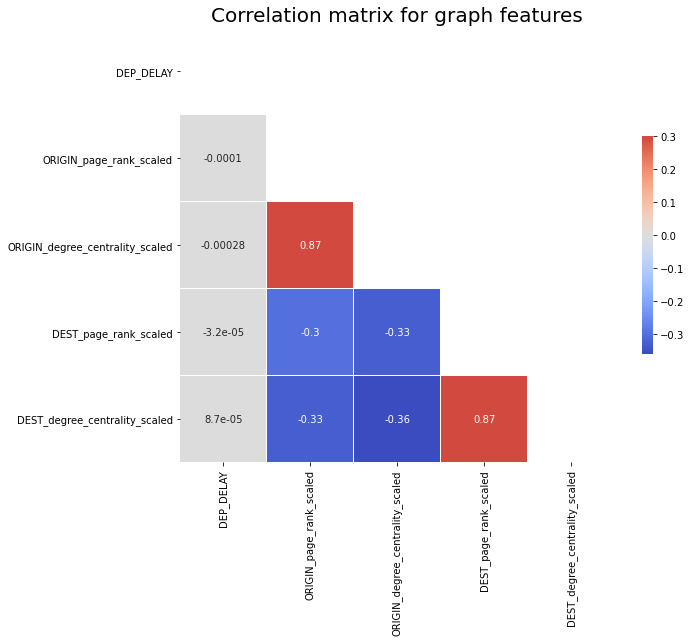

In [0]:
# correlation matrix for graph features
df_corr_graph = df_full_joined[['DEP_DELAY', 'ORIGIN_page_rank_scaled', 'ORIGIN_degree_centrality_scaled', 'DEST_page_rank_scaled', 'DEST_degree_centrality_scaled']]

corrMatrixGraph = df_corr_graph.select("*").toPandas()

#Explore the correlation between weather features and the departure delay
plt.figure(figsize=(10,8))
corr = corrMatrixGraph.corr() 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)
cmap='coolwarm'
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation matrix for graph features',fontsize=20)
plt.show()

Observations:

Graph features do not exhibit significant correlation with departure delays. In contrast, the original features ('DISTANCE', DISTANCE_GROUP', 'CRS_DEP_TIME', 'CRS_ARR_TIME') and the snowball delay features "DEP_DEL15_PREV_FIN" and "NUM_PREV_DELAYS_ORIGIN" have stronger correlations.